# Exercise 1: Implement Simple Linear Regression

Use the computers.csv dataset and perform the following activities:

Dataset contains the details of time taken to repair a computer, given the number of units to be repaired.

Dataset: Download from drive link

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
computers = pd.read_csv('data/computers.csv')

In [3]:
computers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Units    14 non-null     int64
 1   Minutes  14 non-null     int64
dtypes: int64(2)
memory usage: 356.0 bytes


In [4]:
computers

,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74
5,5,87
6,6,96
7,6,97
8,7,109
9,8,119


In [5]:
minutes_model0 = computers['Minutes'].mean()
minutes_modell = 10 + 12*computers['Units']
minutes_model2 = 6 + 18*computers['Units']


In [6]:
computers['min_model0'] = minutes_model0
computers['min_model1'] = minutes_modell
computers['min_model2'] = minutes_model2
computers

,Units,Minutes,min_model0,min_model1,min_model2
0,1,23,97.214286,22,24
1,2,29,97.214286,34,42
2,3,49,97.214286,46,60
3,4,64,97.214286,58,78
4,4,74,97.214286,58,78
5,5,87,97.214286,70,96
6,6,96,97.214286,82,114
7,6,97,97.214286,82,114
8,7,109,97.214286,94,132
9,8,119,97.214286,106,150


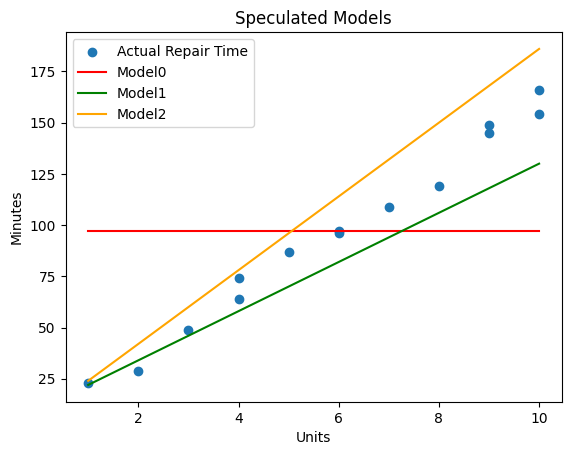

In [7]:
fig,ax = plt.subplots()
ax.scatter(x="Units",y="Minutes",data=computers,label='Actual Repair Time')
ax.plot(computers['Units'],computers['min_model0'],color='red',label='Model0')
ax.plot(computers['Units'],computers['min_model1'],color='green',label='Model1')
ax.plot(computers['Units'],computers['min_model2'],color='orange',label='Model2')
ax.set_ylabel("Minutes")
ax.set_xlabel("Units")
ax.set_title("Speculated Models")
ax.legend()

In [8]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
import sklearn as sln

In [9]:
X = computers[['Units']]

In [10]:
y = computers['Minutes']

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [12]:
print("Intercept:",model.intercept_)
print("Coefficient:",model.coef_)

Intercept: 4.161654135338296
Coefficient: [15.50877193]


In [13]:
computers['min_model3'] = minutes_model3 = model.predict(X)

In [14]:
Rsq = model.score(computers[['Units']],y)
Rsq

0.9874371980620736

# Exercise 2: Multiple Linear Regression Model

std_marks_data.csv

To understand Multiple Linear Regression, let us consider the student marks dataset.

In [46]:
student = pd.read_csv('data/std_marks_data.csv')

In [17]:
student

,hours,age,internet,marks
0,6.84,15,0,78.64
1,6.56,20,1,88.80
2,NaN,21,1,88.90
3,8.67,22,1,98.99
4,7.55,17,1,92.34
...,...,...,...,...
295,2.99,25,0,43.45
296,6.55,15,1,77.74
297,0.00,20,1,75.76
298,9.90,22,0,99.99


In [18]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   hours     288 non-null    float64
 1   age       300 non-null    int64  
 2   internet  300 non-null    int64  
 3   marks     300 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 9.5 KB


In [19]:
student.isna().sum()

hours       12
age          0
internet     0
marks        0
dtype: int64

In [20]:
student.hours = student.hours.fillna(student.hours.mean())

In [47]:
X=student.iloc[:,:-1]

In [48]:
X

,hours,age,internet
0,6.84,15,0
1,6.56,20,1
2,NaN,21,1
3,8.67,22,1
4,7.55,17,1
...,...,...,...
295,2.99,25,0
296,6.55,15,1
297,0.00,20,1
298,9.90,22,0


In [23]:
y=student.iloc[:,-1]

In [24]:
y

0      78.64
1      88.80
2      88.90
3      98.99
4      92.34
       ...  
295    43.45
296    77.74
297    75.76
298    99.99
299    99.99
Name: marks, Length: 300, dtype: float64

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [26]:
x_test.shape

(60, 3)

In [27]:
x_train.shape

(240, 3)

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
print("Intercept:",model.intercept_,"\nCoefficient:",model.coef_)

Intercept: 55.24976856530089 
Coefficient: [0.98654858 0.54025783 2.18635872]


In [29]:
hours=int(input("Enter Study Hours: "))
age=int(input("Enter Age: "))
internet = int(input("Enter internet is available or not(0/1) : "))
data=[[hours,age,internet]]
print(model.predict(data))

[76.10834507]


c:\Users\M M\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Exercise 3: Build Logistic Regression Model

Consider a coronary heart disease dataset (chd_data.csv) which lists the age in years ('age') and the presence/absence of evidence of significant coronary heart disease ('chd') for 100 patients.

The variable chd = 0 indicates the absence of coronary heart disease, whereas chd=1 indicates the presence of coronary heart disease.

In [30]:
chd = pd.read_csv('data/chd_data.csv')

In [31]:
chd

,age,chd
0,20,0
1,23,0
2,24,0
3,25,1
4,25,0
...,...,...
95,63,1
96,64,1
97,64,0
98,65,1


In [32]:
chd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     100 non-null    int64
 1   chd     100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


In [33]:
chd.isna().sum()

age    0
chd    0
dtype: int64

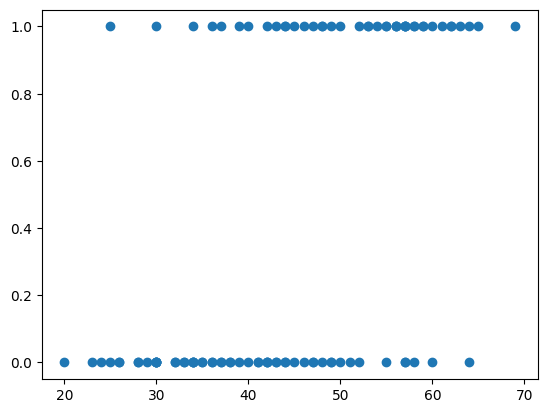

In [34]:
plt.scatter('age','chd',data=chd)

In [35]:
x = chd[['age']]

In [36]:
y = chd['chd']

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [39]:
test=int(input("Enter age: "))
data=[[test]]
print("\nPredicted target i.e. 'chd' value is:",model.predict(data))


Predicted target i.e. 'chd' value is: [0]


c:\Users\M M\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [44]:
print("Accuracy score of the model on training data:",model.score(x_train,y_train))
print("Accuracy score of the model on test data:",model.score(x_test,y_test))

Accuracy score of the model on training data: 0.7
Accuracy score of the model on test data: 0.85
